In [3]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("bestsellers_with_categories_2022.csv")
print(df.head())

                                                Name  \
0                      10-Day Green Smoothie Cleanse   
1                                  11/22/63: A Novel   
2            12 Rules for Life: An Antidote to Chaos   
3                             1984 (Signet Classics)   
4  5,000 Awesome Facts (About Everything!) (Natio...   

                     Author  User Rating  Reviews  Price  Year        Genre  
0                  JJ Smith          4.7    17350      8  2016  Non Fiction  
1              Stephen King          4.6     2052     22  2011      Fiction  
2        Jordan B. Peterson          4.7    18979     15  2018  Non Fiction  
3             George Orwell          4.7    21424      6  2017      Fiction  
4  National Geographic Kids          4.8     7665     12  2019  Non Fiction  


In [4]:
print("\nРозмір датасету:", df.shape)


Розмір датасету: (550, 7)


**Про скільки книг зберігає дані датасет?**

**Відповідь:** Датасет зберігає дані про 550 книг.



In [5]:
df.columns = ['name', 'author', 'user_rating', 'reviews', 'price', 'year', 'genre']

In [6]:
print(df.isna().sum())

name           0
author         0
user_rating    0
reviews        0
price          0
year           0
genre          0
dtype: int64


**Чи є в якихось змінних пропуски?**

**Відповідь:** Ні

In [7]:
print(df['genre'].unique())

['Non Fiction' 'Fiction']


**Які є унікальнні жанри?**

**Відповідь:** унікальні жанри "non-fiction" та "fiction"

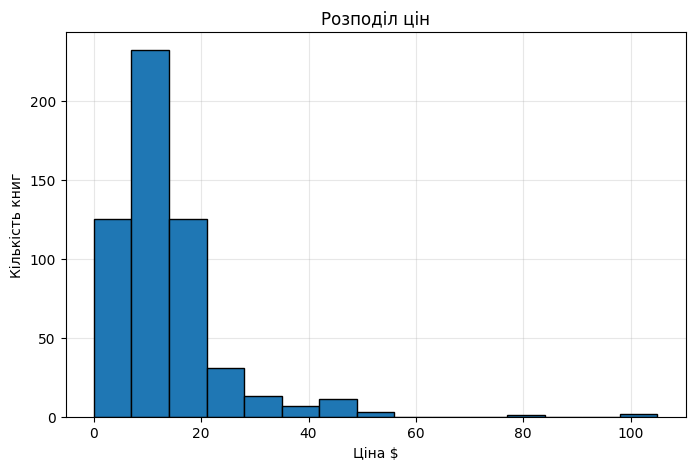

In [8]:
plt.figure(figsize=(8,5))
df['price'].hist(bins=15, edgecolor='black', zorder=2)
plt.title("Розподіл цін")
plt.xlabel("Ціна $")
plt.ylabel("Кількість книг")
plt.grid(alpha=0.3, zorder=1)
plt.show()

In [9]:
max_price = df['price'].max()
min_price = df['price'].min()
mean_price = round(df['price'].mean(), 2)
median_price = df['price'].median()

print("\nМаксимальна ціна:", max_price)
print("Мінімальна ціна:", min_price)
print("Середня ціна:", mean_price)
print("Медіанна ціна:", median_price)


Максимальна ціна: 105
Мінімальна ціна: 0
Середня ціна: 13.1
Медіанна ціна: 11.0



**Максимальна ціна:** 105$

**Мінімальна ціна:** 0$

**Середня ціна:** 13.1$

**Медіанна ціна:** 11.0$

In [10]:
max_rating = df['user_rating'].max()
num_books_max_rating = df[df['user_rating'] == max_rating].shape[0]
print(max_rating)
print(num_books_max_rating)

4.9
52


**Який рейтинг у датасеті найвищий?** найвижчий рейтинг 4.9

**Скільки книг мають такий рейтинг?**
такий рейтинг мають 52 книги

In [11]:
most_reviews = df.loc[df['reviews'].idxmax(), ['name', 'author', 'reviews']]
print(most_reviews)

name       Where the Crawdads Sing
author                 Delia Owens
reviews                      87841
Name: 534, dtype: object


**Яка книга має найбільше відгуків?** найбільше відгуків у книги "Where the Crawdads Sing" (Delia Oweng) - 87841 відгук.

In [12]:
books_2015 = df[df['year'] == 2015]
most_expensive_2015 = books_2015.loc[books_2015['price'].idxmax(), ['name', 'author', 'price']]
print(most_expensive_2015)

name      Publication Manual of the American Psychologic...
author                   American Psychological Association
price                                                    46
Name: 277, dtype: object


**З тих книг, що потрапили до Топ-50 у 2015 році, яка книга найдорожча?**
найдорожча книга, що потрапила у топ-50 2015, - Publication Manual of the American Psychological Association (American Psychological Association) - 46$.

In [13]:
fiction_2010 = df[(df['genre'] == 'Fiction') & (df['year'] == 2010)].shape[0]
print(fiction_2010)

20


**Скільки книг жанру Fiction потрапили до Топ-50 у 2010 році?** До списку жанру Fiction у топ-50 потрапило 20 книг.

In [14]:
rating_4_9 = df[(df['user_rating'] == 4.9) & (df['year'].isin([2010, 2011]))].shape[0]
print(rating_4_9)

1


**Скільки книг з рейтингом 4.9 потрапило до рейтингу у 2010 та 2011 роках?** До списку топ-50 з рейтингом 4.9 у 2010-2011 роках потрапила 1 книга.

In [15]:
books_2015_sorted = df[(df['year'] == 2015) & (df['price'] < 8)].sort_values(by='price')
print("\nКниги 2015 року дешевші за $8:")
print(books_2015_sorted[['name', 'author', 'price']])


Книги 2015 року дешевші за $8:
                                                  name              author  \
507                              To Kill a Mockingbird          Harper Lee   
54   Creative Haven Creative Cats Coloring Book (Ad...     Marjorie Sarnat   
206                         Knock-Knock Jokes for Kids         Rob Elliott   
111                                    First 100 Words        Roger Priddy   
210                      Laugh-Out-Loud Jokes for Kids         Rob Elliott   
123                               Giraffes Can't Dance       Giles Andreae   
55   Creative Haven Owls Coloring Book (Adult Color...     Marjorie Sarnat   
63                      Dear Zoo: A Lift-the-Flap Book        Rod Campbell   
224                                   Love You Forever       Robert Munsch   
478                        The Very Hungry Caterpillar          Eric Carle   
89   Dover Creative Haven Art Nouveau Animal Design...         Marty Noble   
201  Killing Reagan: The Violent

In [16]:
last_book = books_2015_sorted.iloc[-1]
print(last_book[['name', 'author', 'price']])

name      Old School (Diary of a Wimpy Kid #10)
author                              Jeff Kinney
price                                         7
Name: 253, dtype: object


**Яка книга остання у відсортованому списку?** Остання книга у списку - Old School (Diary of a Wimpy Kid #10) (Jeff Kinney) - 7$.

In [17]:
genre_price_stats = df.groupby("genre")["price"].agg(["min", "max"]).reset_index()
print(genre_price_stats)

         genre  min  max
0      Fiction    0   82
1  Non Fiction    0  105


**Максимальна ціна для жанру Fiction:** 82$.

**Мінімальна ціна для жанру Fiction:** 0$.

**Максимальна ціна для жанру Non Fiction:** 105$.

**Мінімальна ціна для жанру Non Fiction:** 0$.

In [18]:
author_books = df.groupby("author")["name"].agg(count="count").reset_index()
print(author_books.head())

                       author  count
0            Abraham Verghese      2
1              Adam Gasiewski      1
2               Adam Mansbach      1
3                   Adir Levy      1
4  Admiral William H. McRaven      1
(248, 2)
author    Jeff Kinney
count              12
Name: 120, dtype: object


In [20]:
print(author_books.shape)
print("\n", author_books.loc[author_books["count"].idxmax()])

(248, 2)

 author    Jeff Kinney
count              12
Name: 120, dtype: object


**Якої розмірності вийшла таблиця?** таблиця вийшла розмірності 248*2

**Який автор має найбільше книг?** автор із найбільшою кількістю книг - Jeff Kinney (12 книг)

In [21]:
author_rating = df.groupby("author")["user_rating"].agg(mean_rating="mean").reset_index()
print(author_rating.head())

                       author  mean_rating
0            Abraham Verghese          4.6
1              Adam Gasiewski          4.4
2               Adam Mansbach          4.8
3                   Adir Levy          4.8
4  Admiral William H. McRaven          4.7


In [22]:
min_rating_author = author_rating.loc[author_rating["mean_rating"].idxmin()]
print(min_rating_author)

author         Donna Tartt
mean_rating            3.9
Name: 71, dtype: object


**У якого автора середній рейтинг мінімальний?** найнижчий рейтинг у автора Donna Tartt - 3.9.

In [23]:
authors_concat = pd.concat([author_books.set_index("author"), author_rating.set_index("author")], axis=1)
print(authors_concat.head())

                            count  mean_rating
author                                        
Abraham Verghese                2          4.6
Adam Gasiewski                  1          4.4
Adam Mansbach                   1          4.8
Adir Levy                       1          4.8
Admiral William H. McRaven      1          4.7


In [26]:
authors_concat_sorted = authors_concat.sort_values(by=["count", "mean_rating"], ascending=[True, True])
print(authors_concat_sorted.head())

                   count  mean_rating
author                               
Muriel Barbery         1          4.0
Chris Cleave           1          4.1
Ian K. Smith M.D.      1          4.1
Pierre Dukan           1          4.1
Elizabeth Strout       1          4.2


**Який автор перший у списку?** Автор із найнижчим рейтингом та найменшою кількістю книг - Muriel Barbery.

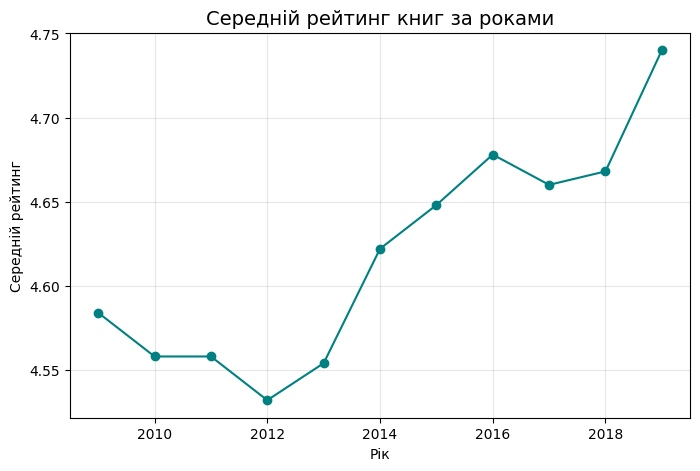

In [29]:
plt.figure(figsize=(8, 5))
df.groupby("year")["user_rating"].mean().plot(kind='line', marker='o', color='teal')
plt.title("Середній рейтинг книг за роками", fontsize=14)
plt.xlabel("Рік")
plt.ylabel("Середній рейтинг")
plt.grid(alpha=0.3)
plt.show()

/tmp/ipython-input-2360531377.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x="genre", palette="pastel")


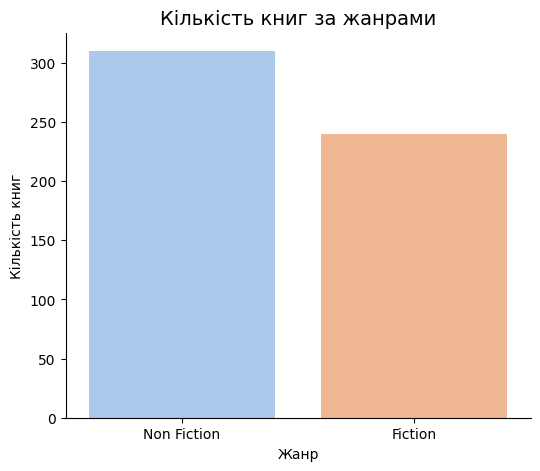

In [30]:
import seaborn as sns

plt.figure(figsize=(6, 5))
sns.countplot(data=df, x="genre", palette="pastel")
plt.title("Кількість книг за жанрами", fontsize=14)
plt.xlabel("Жанр")
plt.ylabel("Кількість книг")
sns.despine()
plt.show()